# Lab 3

## Part I: waves

Download the [wave buoy data for La Perouse Bank (off West Coast of VI)](http://www.ndbc.noaa.gov/station_realtime.php?station=46206). Use the _Real time standard meteorological data_ option. Before you start have a quick look at the _description_ - what kind of data is this? 

Download the data using a shell command. Read the data for the most recent 48 hours and store the first 10 columns into the variables `YY , MM, DD ,hh, mm, WDIR, WSPD, GST,  WVHT, DPD`.

In [2]:
import numpy as np
buoy = np.loadtxt("46206.txt", usecols=(0,1,2,3,4,5,6,7,8,9))
buoy = buoy[:48]
import pandas as pd
buoy = pd.read_csv("46206.txt", delim_whitespace=True, skiprows=[1], nrows=48)
YY = buoy["#YY"].values
MM = buoy["MM"].values
DD = buoy["DD"].values
hh = buoy["hh"].values
mm = buoy["mm"].values
WDIR = buoy["WDIR"].values
WSPD = buoy["WSPD"].values
GST = buoy["GST"].values
WVHT = buoy["WVHT"].values
DPD = buoy["DPD"].values

In [3]:
# YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD


Create a time variable that starts at `t=0 hrs` with the earliest time and goes forward in hours. Plot the wind speed as a function of this time variable.

In [4]:
import astropy.units as u
DD1 = DD - 23
DD2 = DD1*u.d
DD3 = (DD2.to('hr'))

In [5]:
hh1 = hh - 19
hh2 = hh1*u.h

In [6]:
hours = DD3 + hh2
t = hours[::-1]
t

<Quantity [-479.,-478.,-477.,-476.,-475.,-474.,-473.,-472.,-471.,-470.,
           -469.,-468.,-467.,-466.,-465.,-464.,-463.,-462.,-461.,-460.,
           -459.,-458.,-457.,-456.,-455.,-454.,-453.,-452.,-451.,-450.,
           -449.,-448.,-447.,-446.,-445.,-444.,-443.,-442.,-441.,-440.,
           -439.,-438.,-437.,-436.,-435.,-434.,-433.,-432.] h>

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


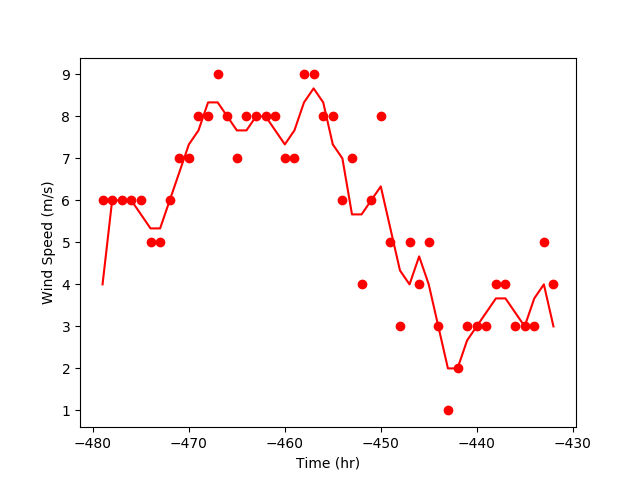

In [7]:
%pylab nbagg

plot(t,WSPD, "ro")
xlabel('Time (hr)')
ylabel('Wind Speed (m/s)')

Smooth the data by forming a centered moving average (CMA), where each value is replaced by the average of the value and the neighboring value on each side. Plot this smoothed data along with the original data. 

In [8]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
WSPD_av = movingaverage(WSPD, 3)
plot(t,WSPD_av, "r")
show()


Create a spline fit, using sympy's splrep/splev function. Adjust the smoothing parameter so that the spline fit looks similar to the CMA line.

In [9]:
from scipy import interpolate as inter
s=0.8
tck = inter.splrep(t,WSPD,s=s)
plot(t,inter.splev(t, tck))


SystemError: dfitpack.curfit() 1st keyword (xb) can't be converted to double

Make a plot of wave height agains wind speed using smoothed data.

## Part II: units
How much water do you have to store on your 10m high roof-top in order to store enough potential energy, that - if transformed without losses - could run a 50W bulp for 5 hr?

In [ ]:
import astropy.units as u
import astropy.constants as c

## Part III: integrate 
Using scipy's `integrate.cumtrapz` integrate one more time the area under a quadrant of a circle to determine $\pi$.
